Based on Lorena Barba's MOOC on mumerical methods(https://github.com/numerical-mooc/numerical-mooc/tree/master/lessons/01_phugoid), we will attempt to model the phugoid oscillations of a glider.

A phugoid is an oscilation in the flight path of an airplane or glider. Barba provides a video that shows this phenomenon.

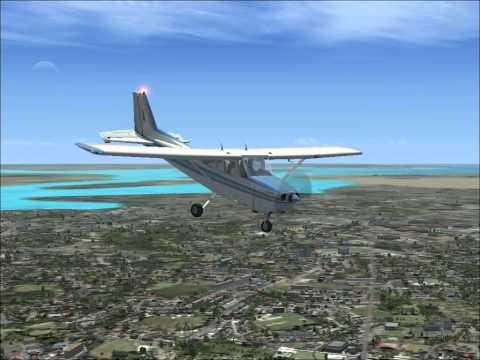

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ysdU4mnRYdM')

Barba gives us a very thorough derivation of the forces involved in flight, as well as the equations of motion that model phugoid motion. I will not go through the derivation in this notebook, but I highly recommend reading the MOOC and working through the math along with Barba.

Here we will hit some of the highlights of the math.

From Barba, lift is described as:

$$
\begin{align}
L &= C_L S \times \frac{1}{2} \rho v^2 \\
D &= C_D S \times \frac{1}{2} \rho v^2
\end{align}
$$

where $C_l, C_D,$ are the coefficients of lift and drag respectively, $S$ is the surface area of the wings, $\rho$ is the pressure of the air and $v$ is the speed of the aircraft.

We can write the lift to weight ratio as a function of the speed required for level flight ($v_t$) and the speed that the glider is actually moving.

$$
\begin{align}
\frac{L}{W} = \frac{v^2}{v_t^2}
\end{align}
$$

Now we describe the motion of the glider along with the drag

$$
\begin{align}
\frac{dv}{dt} & = - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\
\frac{d\theta}{dt} & = - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v
\end{align}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# definition of ode solvers as functions

def Euler(diffeq, y0, t, h):
    dydt = diffeq(y0, t) #get {dy/dt} at t
    return y0 + h*dydt

def RK2(diffeq, y0, t, h):
    k1 = h*diffeq(y0, t)
    k2 = h*diffeq(y0 + 0.5*k1, t+h/2)
    return y0 + k2

def RK4(diffeq, y0, t, h):
    k1 = h*diffeq(y0, t)                    # dy/dt at t
    k2 = h*diffeq(y0+0.5*k1, t + h/2.)      # dy/dt at t+h/2
    k3 = h*diffeq(y0+0.5*k2, t + h/2.)      # dy/dt at t+h/2
    k4 = h*diffeq(y0+k3, t + h)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0

In [4]:
def glider(y0, t):   # y0 = [x, y, v, theta]
    
    speed = y0[2]
    theta = y0[3]
    
    dydt = np.zeros(4) # derivatives of [x, y, v, theta] to return
    
    dydt[0] = speed*np.cos(theta) # x velocity 
    dydt[1] = speed*np.sin(theta) # y velocity 
    
    dydt[2] = -g*np.sin(theta)-(CD/CL)*(g/vt**2)*speed**2 # velocity equation from Lorena Barba's MOOC
    dydt[3] = -g/speed * np.cos(theta) + g/vt**2 * speed  # theta equation from Lorena Barba's MOOC
    
    return dydt

In [5]:
# Set parameters
g = 9.8
vt = 30.0  # trim velocity (m.s)
CD = 1.0 / 40  # drag coefficient
CL = 1.0  # lift coefficient
    
# Set initial conditions.
vinit = vt  # start at the trim velocity
thetainit = 0  # trajectory angle
xinit = 0.0  # horizontal position
yinit = 1000.0  # vertical position (altitude)

y0 = [xinit, yinit, vinit, thetainit] # y0 = [x, y, v, theta]
t = 0.0
h = 0.1
ta, xn, yn, vn, thn = [],[],[],[],[] #lists to store time, x, y, v, theta 

while t<100:
    ta.append(t)
    xn.append(y0[0]) # x position determined numerically
    yn.append(y0[1]) # y position determined numerically
    vn.append(y0[2]) # v
    thn.append(y0[3]) # theta

    ####### Solver #######
#     # RK2
#     y1 = RK2(glider, y0, t, h) # update y[n]
    
    # RK4
    y1 = RK4(glider, y0, t, h) # update y[n]
    
#     # Euler
#     y1 = Euler(glider, y0, t, h) # update y[n]
    
    
    for i in range(len(y1)): #reset y0 to the new vector
        y0[i] = y1[i]
    
    t = t + h #update clock

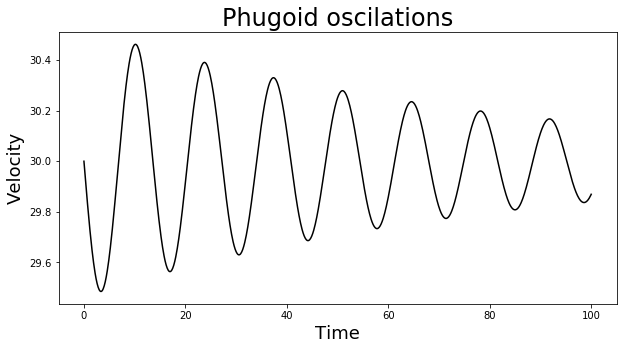

In [6]:
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
%matplotlib inline

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)              # defines a graph ax
ax.plot(ta,vn,color="k")

ax.set_xlabel("Time",fontsize=18)
ax.set_ylabel("Velocity",fontsize=18)
ax.set_title("Phugoid oscilations",fontsize=24)
# ax.grid('on')

# ax.annotate("Blah blah",xy = (60,990),fontsize = 15)  # creates annotation box starting at coordinates xy

plt.savefig('TvV.pdf',dpi=300,bbox_inches = 'tight')

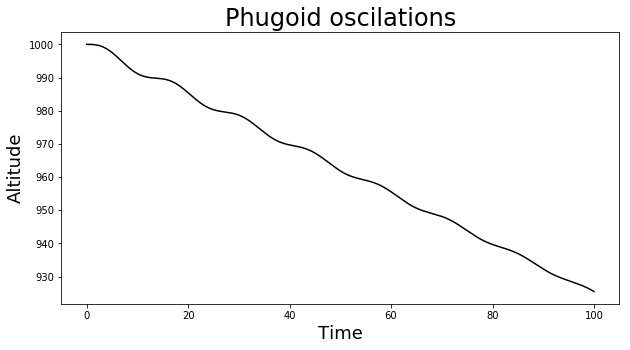

In [7]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)              # defines a graph ax
ax.plot(ta,yn,color="k")

ax.set_xlabel("Time",fontsize=18)
ax.set_ylabel("Altitude",fontsize=18)
ax.set_title("Phugoid oscilations",fontsize=24)
# ax.grid('on')

# ax.annotate("Blah blah",xy = (60,990),fontsize = 15)  # creates annotation box starting at coordinates xy

plt.savefig('TvY.pdf',dpi=300,bbox_inches = 'tight')

The reason the altidude falls as it oscilates and the oscilation of the velocity is because the drag force acts to dissapate the energy of the aircraft.